# 예측 모델 실습

### auto-mpg.csv 데이터를 통해,  
### mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon - 연비),

cylinders (실린더 갯수)

engine displacement (inches 배기량),

horsepower (마력),

vehicle weight (lbs. 무게),

time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간),

model year ,

origin of car (1. American,   2. European,   3. Japanese).

Also provided are the car labels (types)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/auto-mpg.csv')

In [3]:
df.head(2)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [5]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [6]:
y = df['mpg']

In [15]:
X = df.drop(['mpg','name'], axis=1)

In [16]:
X.head(2)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
from sklearn.compose import ColumnTransformer

In [22]:
from sklearn.model_selection import train_test_split

In [ ]:
# Linear는 스케일링 필요없어서 바로 넘어감

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [25]:
X_train.shape

(313, 7)

In [26]:
X_test.shape

(79, 7)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor = LinearRegression()

In [31]:
# 깡통머신 노란색
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# 학습이 끝나면 파란색
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# 학습에 사용하지 않은 데이터
X_test.head(2)

,cyl,displ,hp,weight,accel,yr,origin
388,4,97.0,52,2130,24.6,82,2
179,4,91.0,53,1795,17.5,75,3


In [36]:
y_pred = regressor.predict(X_test)

In [39]:
y_pred

array([33.77637511, 32.03002602, 33.46916321, 16.46658529, 27.04246221,
       36.23268309, 21.84654564,  7.40882559, 24.30017362, 32.85068434,
       23.29907663, 11.48360071, 30.74519914, 24.20686942, 15.2416448 ,
       27.91866465, 30.92615813, 26.47153432, 29.81434677, 14.94740617,
       22.84369014, 23.6860258 , 18.84233189, 12.13696003, 24.39136642,
       26.04794718, 19.99742236, 21.17515858, 35.75628988, 32.75315201,
       26.7418266 , 34.39403901, 22.93639089, 10.971734  , 30.10291751,
       31.0906723 , 31.19541007, 26.75046042, 13.38573253, 20.31549299,
       23.59558341, 19.69359091, 29.26406708, 25.16933883, 29.00232429,
       14.88468425, 25.89330742, 23.260891  , 17.54134266, 23.33460275,
       17.99556829, 14.68236867, 33.36062646, 17.3473357 , 21.0875401 ,
       22.41629019, 11.80917877, 31.4780056 , 26.39413937, 28.36688952,
       19.07050311, 21.96364778, 25.97957503, 19.90336795, 10.83521095,
       16.01838471, 25.48087867, 12.75771163, 20.80404127, 26.71

In [38]:
y_test

388    44.0
179    33.0
292    34.1
211    13.0
19     26.0
       ... 
104    13.0
152    15.0
226    18.5
248    19.4
111    19.0
Name: mpg, Length: 79, dtype: float64

In [62]:
# MSE 수작업 : 실제값-예측값 알고있어야!
((y_test - y_pred)**2).mean()

12.440699176751943

In [59]:
# 라이브러리 사용
# 성능평가 metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [45]:
mean_squared_error(y_test, y_pred)

12.440699176751943

In [48]:
import math

In [50]:
# RMSE
math.sqrt(mean_squared_error(y_test, y_pred))

3.5271375330077426

In [52]:
root_mean_squared_error(y_test, y_pred)

3.5271375330077426

In [54]:
mean_absolute_error(y_test, y_pred)

2.5840040608985895

In [61]:
# 0과 1사이 : 1로 나올수록 성능이 좋은 것
r2_score(y_test, y_pred)

0.7893105393729918

In [63]:
# 차트로 확인해보기

In [68]:
df_test = y_test.to_frame().reset_index(drop=True)

In [69]:
df_test['y_pred'] = y_pred

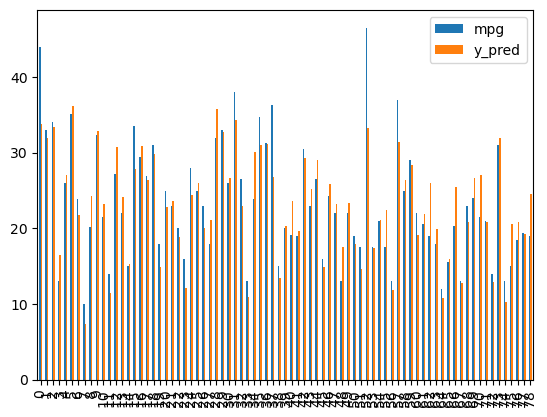

In [74]:
df_test.plot(kind='bar')
plt.show()

In [78]:
# y_test : 시리즈
print(y_test)
y_test.values

388    44.0
179    33.0
292    34.1
211    13.0
19     26.0
       ... 
104    13.0
152    15.0
226    18.5
248    19.4
111    19.0
Name: mpg, Length: 79, dtype: float64


array([44. , 33. , 34.1, 13. , 26. , 35.1, 23.9, 10. , 20.2, 32.4, 21.5,
       14. , 27.2, 22. , 15. , 33.5, 29.5, 27. , 31. , 18. , 25. , 23. ,
       20. , 16. , 28. , 25. , 23. , 18. , 32. , 33. , 26. , 38.1, 26.6,
       13. , 23.9, 34.7, 31.3, 36.4, 15. , 20. , 19.1, 19. , 30.5, 23. ,
       26.6, 16. , 24.3, 22. , 13. , 22. , 19. , 17.5, 46.6, 17.5, 21. ,
       17.5, 13. , 37. , 25. , 29. , 22. , 20.6, 19. , 18. , 12. , 15.5,
       20.3, 13. , 23. , 24. , 21.5, 21. , 14. , 31. , 13. , 15. , 18.5,
       19.4, 19. ])

In [77]:
y_pred

array([33.77637511, 32.03002602, 33.46916321, 16.46658529, 27.04246221,
       36.23268309, 21.84654564,  7.40882559, 24.30017362, 32.85068434,
       23.29907663, 11.48360071, 30.74519914, 24.20686942, 15.2416448 ,
       27.91866465, 30.92615813, 26.47153432, 29.81434677, 14.94740617,
       22.84369014, 23.6860258 , 18.84233189, 12.13696003, 24.39136642,
       26.04794718, 19.99742236, 21.17515858, 35.75628988, 32.75315201,
       26.7418266 , 34.39403901, 22.93639089, 10.971734  , 30.10291751,
       31.0906723 , 31.19541007, 26.75046042, 13.38573253, 20.31549299,
       23.59558341, 19.69359091, 29.26406708, 25.16933883, 29.00232429,
       14.88468425, 25.89330742, 23.260891  , 17.54134266, 23.33460275,
       17.99556829, 14.68236867, 33.36062646, 17.3473357 , 21.0875401 ,
       22.41629019, 11.80917877, 31.4780056 , 26.39413937, 28.36688952,
       19.07050311, 21.96364778, 25.97957503, 19.90336795, 10.83521095,
       16.01838471, 25.48087867, 12.75771163, 20.80404127, 26.71

In [ ]:
# 한글  깨질 때
%pip install koreanize-matplotlib
from koreanize_matplotlib import koreanize
koreanize()

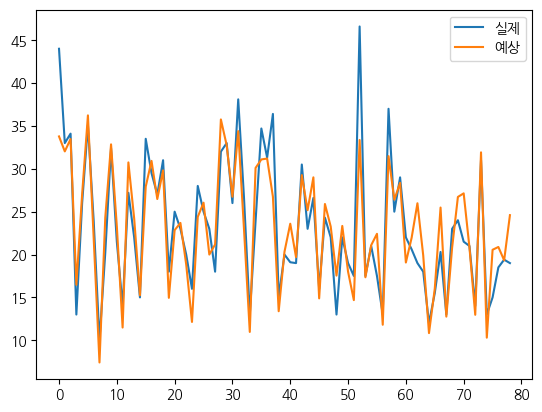

In [82]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['실제','예상'])
plt.show()

실습

In [86]:
df = pd.read_csv('../data/ecommerce.csv', index_col=0)

In [92]:
df.head(2)

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210


In [ ]:
df.describe()

In [90]:
df['IsHoliday'].unique()

array([0, 1], dtype=int64)

In [91]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

# 상관관계 분석

In [93]:
df.corr()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
DayOfWeek,1.000000,-0.101485,-0.027126,0.058028,0.054830,-0.001853,-0.076832
IsHoliday,-0.101485,1.000000,0.007405,-0.042057,-0.034416,-0.009566,0.121911
MarketingSpend,-0.027126,0.007405,1.000000,0.024803,-0.041695,0.012718,0.582831
CompetitorPrice,0.058028,-0.042057,0.024803,1.000000,0.066226,0.033093,-0.297661
Price,0.054830,-0.034416,-0.041695,0.066226,1.000000,-0.078575,-0.703286
Month,-0.001853,-0.009566,0.012718,0.033093,-0.078575,1.000000,-0.185007
Sales,-0.076832,0.121911,0.582831,-0.297661,-0.703286,-0.185007,1.000000


In [95]:
df[['IsHoliday','MarketingSpend']].corr()

,IsHoliday,MarketingSpend
IsHoliday,1.000000,0.007405
MarketingSpend,0.007405,1.000000


In [96]:
df[['IsHoliday','Sales']].corr()

,IsHoliday,Sales
IsHoliday,1.000000,0.121911
Sales,0.121911,1.000000


In [98]:
df[['Price','CompetitorPrice','Sales']].corr()

,Price,CompetitorPrice,Sales
Price,1.000000,0.066226,-0.703286
CompetitorPrice,0.066226,1.000000,-0.297661
Sales,-0.703286,-0.297661,1.000000


In [99]:
# 파이차트? 페센테이지로 나타내고 싶을 때

In [100]:
# 두 컬럼간의 관계? 스케터

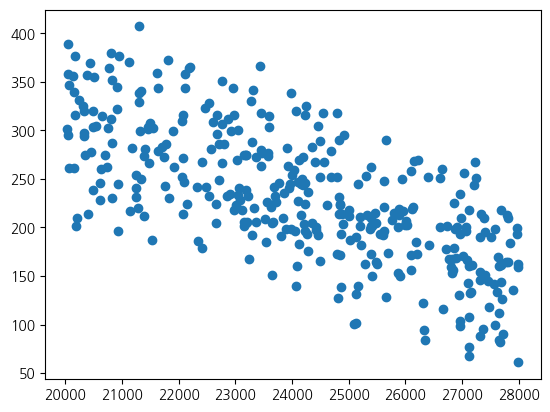

In [101]:
plt.scatter(data= df, x='Price', y='Sales')
plt.show()

In [103]:
df[['Price','Sales']].head(5)

,Price,Sales
0,24926,295
1,27811,210
2,26016,207
3,23335,220
4,27068,201


In [106]:
df[['Price','Sales']].corr()

,Price,Sales
Price,1.000000,-0.703286
Sales,-0.703286,1.000000


In [110]:
import seaborn as sb

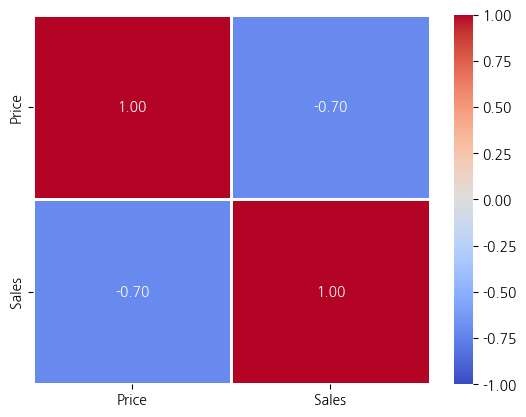

In [111]:
sb.heatmap(data=df[['Price','Sales']].corr(), linewidths=0.8, vmin=-1, vmax=1, cmap='coolwarm',
          annot=True, fmt='.2f')
plt.show()

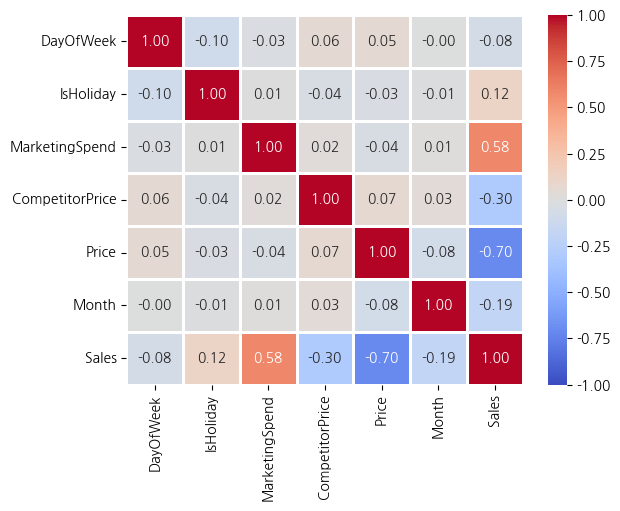

In [112]:
sb.heatmap(data=df.corr(), linewidths=0.8, vmin=-1, vmax=1, cmap='coolwarm',
          annot=True, fmt='.2f')
plt.show()

## 매출 예측 인공지능 만들기

In [113]:
df.isna().sum()

DayOfWeek          0
IsHoliday          0
MarketingSpend     0
CompetitorPrice    0
Price              0
Month              0
Sales              0
dtype: int64

In [114]:
df.head(3)

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207


In [115]:
y = df['Sales']

In [135]:
# 2차원이기 때문에 대문자 쓴다
X = df.drop(['Sales','DayOfWeek'], axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train

In [136]:
regressor = LinearRegression()

In [137]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [138]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [140]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

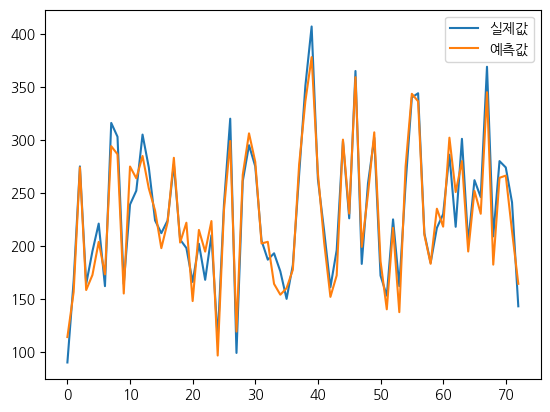

In [145]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['실제값','예측값'])
plt.show()

In [126]:
mean_squared_error(y_test, y_pred)

263.2756489041433

In [147]:
# 1에 가까울수록 좋다!
r2_score(y_test, y_pred)

0.9373099046701093

In [130]:
df_test = y_test.to_frame().reset_index(drop=True)

In [ ]:
df_test

In [132]:
df_test['y_pred'] = y_pred

In [ ]:
df_test

In [ ]:
df_test.plot(kind='bar')
plt.show()

# 이제부터 리그레션에 많이 사용하는 2가지 더 알아보자
### RandomForest
### XGBoost

In [148]:
from sklearn.ensemble import RandomForestRegressor

## RandomForestRegressor

In [173]:
# 동일 결과 유도
regressor2 = RandomForestRegressor(n_estimators=500, random_state=7)

In [ ]:
regressor2.fit(X_train, y_train)

In [175]:
y_pred2 = regressor2.predict(X_test)

In [176]:
# 실제값과 리니어그레션 예측값, 랜던포레스트 예측값 전부 합쳐서 보자.

In [177]:
df_test2 = y_test.to_frame().reset_index(drop=True)

In [178]:
df_test2['linear'] = y_pred

In [179]:
df_test2['random']= y_pred2

In [ ]:
df_test2

In [181]:
# 리니어
mean_squared_error(y_test, y_pred)

263.2756489041433

In [182]:
# 랜덤포레스트
mean_squared_error(y_test, y_pred2)

317.617781369863

In [183]:
# r2
r2_score(y_test, y_pred)

0.9373099046701093

In [184]:
# r2
r2_score(y_test, y_pred2)

0.924370183587337

## XGBoost

In [ ]:
! pip install xgboost

In [186]:
from xgboost import XGBRegressor

In [201]:
regressor3 = XGBRegressor(n_estimators = 300, learning_rate=0.01, random_state=7)

In [202]:
regressor3.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [203]:
y_pred3 = regressor3.predict(X_test)

In [204]:
# 데이터프레임에 합쳐보자

In [205]:
df_test['xgboost'] = y_pred3

In [206]:
df_test

,Sales,y_pred,xgboost
0,90,113.992834,119.604721
1,167,156.491112,167.559677
2,275,274.063137,271.428497
3,164,158.359227,196.719986
4,195,172.570974,181.151428
...,...,...,...
68,209,182.315941,187.281311
69,280,264.233768,253.616394
70,274,266.315420,264.735596
71,241,213.766651,231.854813


In [211]:
mean_squared_error(y_test, y_pred)

263.2756489041433

In [212]:
mean_squared_error(y_test, y_pred2)

317.617781369863

In [213]:
mean_squared_error(y_test, y_pred3)

337.25164794921875

In [214]:
r2_score(y_test, y_pred3)

0.9196950197219849

In [215]:
## 파이프라이닝, 그리드서치

In [320]:
df = pd.read_csv('../data/healthcare.csv', index_col=0)

In [321]:
df.head(5)

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
0,51.0,Female,NaN,South,No,19.0,70.081987
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
2,14.0,Male,NaN,North,No,8.0,46.794138
3,NaN,Female,27.020924,West,No,7.0,44.789132
4,60.0,Male,37.961368,North,No,16.0,71.790344


In [322]:
df.isna().sum()

Age               30
Gender             0
BMI               50
Region             0
Smoker             0
NumVisits         20
InsuranceClaim     0
dtype: int64

In [323]:
df.dropna(axis=0, inplace=True)

In [324]:
df.head(2)

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
4,60.0,Male,37.961368,North,No,16.0,71.790344


In [325]:
sorted(df['Smoker'].unique())

['No', 'Yes']

In [326]:
sorted(df['Region'].unique())

['East', 'North', 'South', 'West']

In [327]:
y = df['InsuranceClaim']

In [328]:
X = df.drop('InsuranceClaim', axis=1)

In [329]:
X.head(3)

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0
5,20.0,Female,29.676706,East,No,1.0


In [330]:
y

1      92.747518
4      71.790344
5      39.417650
6      57.164211
7      70.191544
         ...    
495    79.352997
496    64.364345
497    74.631320
498    75.066459
499    45.184790
Name: InsuranceClaim, Length: 407, dtype: float64

In [331]:
sorted(df['Gender'].unique())

['Female', 'Male']

In [332]:
sorted(df['Region'].unique())

['East', 'North', 'South', 'West']

In [333]:
sorted(df['Smoker'].unique())

['No', 'Yes']

In [365]:
# lable 은 컬럼트랜스포머 안에 사용 불가
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [342]:

ct = ColumnTransformer( [ ('lable', OrdinalEncoder(), [1,4] ),
                          ('onehot', OneHotEncoder(), [3] ),
                          ('scaler', MinMaxScaler(), [0,2,5] ) ] )

In [366]:
# X_scaled = ct.fit_transform(X)

In [345]:
regressor = LinearRegression()

In [ ]:
# regressor.fit(X_train, y_train)

In [ ]:
# y_pred = regressor.predict(X_test)

In [ ]:
# r2.score(y_test, y_pred)

In [ ]:
# 파이프라이닝

In [347]:
from sklearn.pipeline import Pipeline

In [348]:
# steps 사용은 옵션
pipe = Pipeline( steps= [ ('preprocessing', ct ) ,
                          ('regressor' , regressor ) ] )

In [349]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('lable', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [350]:
y.head()

1    92.747518
4    71.790344
5    39.417650
6    57.164211
7    70.191544
Name: InsuranceClaim, dtype: float64

In [351]:
X.head()

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0
5,20.0,Female,29.676706,East,No,1.0
6,82.0,Male,15.821167,North,No,2.0
7,86.0,Male,37.818737,East,No,7.0


In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [353]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('lable', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [354]:
y_pred = pipe.predict(X_test)

In [355]:
y_pred

array([60.48179805, 63.44516252, 70.611469  , 75.50964392, 53.63202614,
       75.92428158, 68.23389507, 60.745702  , 57.88668667, 77.3705967 ,
       62.32608181, 48.07742276, 72.88405212, 58.57231464, 73.48760367,
       54.7762362 , 64.18756789, 34.58433538, 48.10909232, 52.75001431,
       62.85027794, 56.5074751 , 56.82426901, 64.14919401, 59.0861962 ,
       79.7081743 , 63.23824524, 66.16196108, 86.89309729, 50.84820087,
       51.46942912, 83.65905403, 47.35463392, 56.30942085, 59.36965568,
       66.29350362, 45.91499134, 59.82016783, 69.97794308, 50.9048794 ,
       50.0260105 , 74.82448634, 60.18005206, 60.80523452, 61.73678859,
       45.86720029, 74.87528696, 62.71868922, 73.6312923 , 42.41557012,
       61.43212545, 58.87826111, 39.776723  , 50.00651981, 51.54248203,
       71.51084195, 56.33379702, 69.57272917, 69.37206007, 70.10244501,
       78.16562373, 40.30721566, 81.29297702, 55.47194826, 74.71648172,
       83.37170417, 52.45509128, 50.98171809, 53.66206206, 65.75

In [356]:
import joblib

In [357]:
joblib.dump(pipe, 'pipe.pkl')

['pipe.pkl']

In [358]:
pipe2 = joblib.load('pipe.pkl')

In [359]:
# 새로운 사람의 데이터 있을 때,보험금 수령액 예측

In [360]:
# 나이 45세, 남자,bmi 28.5, 지역 South, 흡연자, 병원방문 12

In [361]:
df.head(5)

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
4,60.0,Male,37.961368,North,No,16.0,71.790344
5,20.0,Female,29.676706,East,No,1.0,39.417650
6,82.0,Male,15.821167,North,No,2.0,57.164211
7,86.0,Male,37.818737,East,No,7.0,70.191544


In [362]:
data = [{'Age':45, 'Gender':'Male', 'BMI':28.5, 'Region':'South', 'Smoker': 'Yes', 'NumVisits':12}]

In [363]:
new_data = pd.DataFrame(data)

In [364]:
pipe2.predict(new_data)

array([69.93560068])

In [367]:
from sklearn.ensemble import RandomForestRegressor

In [368]:
# 그리드 서치를 적용 grid search

In [370]:
regressor2 = RandomForestRegressor(random_state=7)

In [371]:
pipe = Pipeline( [ ( 'preprocessing', ct ) ,
                   ( 'regressor2', regressor2 ) ] )

In [ ]:
regressor2

In [383]:
# 파라미터 변경
# 파이프라인의 이름 언더바2번 __
# 5 x 4 x3x3= 180 개 조합 --> 인공지능 20개 
param_grid = {'regressor2__n_estimators':[ 50,100,200,300,400 ],
              'regressor2__max_depth':[ None, 10,20,30 ],
              'regressor2__min_samples_split': [ 2,5,10 ],
              'regressor2__min_samples_leaf':[ 1,2,4 ] }

In [378]:
from sklearn.model_selection import GridSearchCV

In [394]:
# scoring 옵션 선택가능
# scoring은 클수록 좋은 것이기 때문에 부정의미 neg 사용
# 실무에서 보통 cv=10
# verbose : 화면에 표시 -> 눈으로 확인하기 위해
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10,
                          verbose = 2)
# grid_search = GridSearchCV(pipe, param_grid, scoring=r2)

In [ ]:
grid_search.fit(X_train, y_train)

In [391]:
# pipe.fit(X_train, y_train)

In [392]:
y_pred = pipe.predict(X_test)

In [393]:
r2_score(y_test, y_pred)

0.7553055051573474

### 최적의 파라미터와 성능을 확인하자.

In [396]:
grid_search.best_params_

{'regressor2__max_depth': None,
 'regressor2__min_samples_leaf': 1,
 'regressor2__min_samples_split': 5,
 'regressor2__n_estimators': 200}

In [397]:
grid_search.best_score_

-35.56383739500035

In [400]:
# 최고의 인공지능
best_regressor = grid_search.best_estimator_

In [402]:
y_pred = best_regressor.predict(X_test)

In [403]:
mean_squared_error(y_test, y_pred)

39.21896662777554

In [404]:
r2_score(y_test, y_pred)

0.7564181823900007

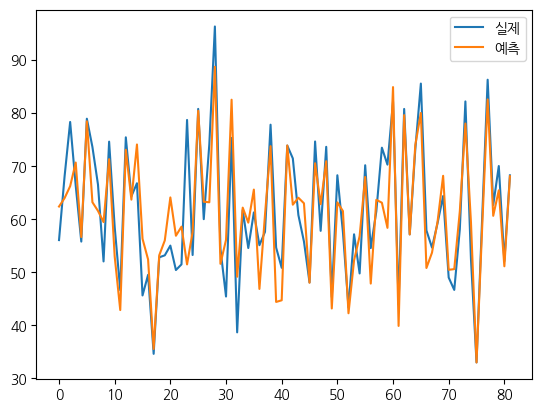

In [410]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['실제','예측'])
plt.show()

### 리그레션 문제는 리니어그레션, 랜덤포레스트, xg부스트를 이용